<a href="https://colab.research.google.com/github/AlbertFlorinus/dr-mhack_2/blob/master/plotteryear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import math
import matplotlib.pyplot as plt
from networkx.algorithms.shortest_paths.generic import shortest_path
from networkx.classes.function import path_weight
import itertools
from networkx.algorithms import approximation as approx

global G
G = nx.Graph()

In [2]:
import string
import random

def rand_graph(n):
    string.ascii_letters = 'abcdefghijklmnopqrstuvwxyz'

    names = [random.choice(string.ascii_letters)+random.choice(string.ascii_letters)+random.choice(string.ascii_letters) for i in range(n)]
    x_coords = [random.randint(1,50) for i in range(n)]
    y_coords = [random.randint(1,50) for i in range(n)]

    coords = [(x, y) for x, y in zip(x_coords, y_coords)]
    dricka = [random.randint(1,15) for i in range(n)]

    fester = {name: {"pos": P, "alkohol": dricka} for name, P, dricka in zip(names, coords, dricka)}
    return fester

In [3]:
def dist(p0, p1):
    dist = math.sqrt( sum( [abs(i-j)**2 for i, j in zip(p0,p1) ] ) )

    return int(round(dist, 0))

In [4]:
def generate_graph(fester = False):
    if fester == False:
        fester = {"minerva": {"pos":(10,30), "alkohol":4}, "krebo": {"pos":(40,50), "alkohol":1}, "kungsmarken": {"pos":(130,210), "alkohol":2}}

    edges = {i:{} for i in fester.keys()}

    for fest in fester.keys():
        p0 = fester[fest]["pos"]

        for key in set(fester.keys()) - set({fest}):
            p1 = fester[key]["pos"]
            distance = dist(p0, p1)
            edges[fest][key] = distance

    every_edge = []
    for key, val in edges.items():
        for destination, weight in val.items():
            every_edge.append( (key, destination, weight) )

    for FEST in fester.keys():
        G.add_node(FEST, alkohol = fester[FEST]["alkohol"], party = True)
    G.add_weighted_edges_from(every_edge)


In [ ]:
fester = {'minerva': {'pos': (106, 37), 'alkohol': 5}, 'trossö': {'pos': (38, 63), 'alkohol': 7}, 'kungsmarken': {'pos': (200, 19), 'alkohol': 6}, 'hästö': {'pos': (210, 68), 'alkohol': 5}, 'saltä': {'pos': (33, 10), 'alkohol': 2}, 'flottan': {'pos': (146, 79), 'alkohol': 10}}

In [5]:
fester = {'a': {'pos': (10, 10), 'alkohol': 4}, 'b': {'pos': (0, 7), 'alkohol': 5}, "c": {"pos":(0, 12), "alkohol": 3}, "d": {"pos":(13, 4), "alkohol": 7}, "e": {"pos": (15, 11), "alkohol": 2}, "f":{"pos": (4, 1), "alkohol": 8}}

In [5]:
fester = rand_graph(10)

In [6]:
generate_graph(fester)

In [7]:
def colab_test():
    val_map ={node: float(G.nodes[node]["alkohol"]) for node in G.nodes() }
    values = [val_map.get(node, 0.25) for node in G.nodes()]
    distances = nx.get_edge_attributes(G, "weight")

    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, cmap=plt.get_cmap("viridis"), node_color = values, with_labels=True)

    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)


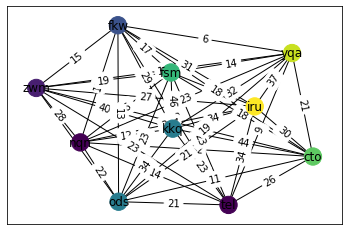

In [8]:
colab_test()

In [9]:
def best_night(start, max_length, fester):
    possi = set(fester.keys()-{start})
    alk_max = 0
    valid_paths = []


    for each in possi:
        #print("\n till: ", each)
        for path in nx.all_simple_paths(G, source=start, target=each):
            length_travelled = path_weight(G, path, weight="weight")
            if length_travelled < max_length:

                #print("valid path: ", path)
                valid_paths.append([path, length_travelled])

    return valid_paths

In [10]:
def optimal_drinking(valid_paths):
    results = []
    for path in valid_paths:
        #a valid path never revisits a node
        dricka = 0

        #count the drinks from the path
        for place in path[0]:
            dricka += G.nodes[place]["alkohol"]
        results.append( [path[0], dricka, path[1] ])

    best_alk = 0
    best_path = []
    
    for route in results:
        print(route[1], best_alk, route[0])
        if route[1] > best_alk:
            best_alk = route[1]
            best_path = route[0]
    return best_path, best_alk
    #print(best_path, best_alk)


In [12]:
valid_paths = best_night("kkq", 50, fester)

In [ ]:
b, a = optimal_drinking(valid_paths)

In [14]:
print(b, a)

['kkq', 'nqn', 'tel', 'yqa', 'fsm'] 39
